In [1]:
import pandas as pd
import numpy as np

f1 = 'Fare_Card_History_for_Metropolitan_Transportation_Authority__MTA___Beginning_2010.csv'
f2 = 'MTA_Customer_Feedback_Data__Beginning_2014.csv'

In [2]:
fare = pd.read_csv(f1)
feed = pd.read_csv(f2)

In [3]:
fare.columns

Index([u'From Date', u'To Date', u'Remote Station ID', u'Station',
       u'Full Fare', u'Senior Citizen / Disabled',
       u'7 Day ADA Farecard Access System Unlimited',
       u'30 Day ADA Farecard Access System Unlimited',
       u'Joint Rail Road Ticket', u'7 Day Unlimited', u'30 Day Unlimited',
       u'14 Day Reduced Fare Media Unlimited', u'1 Day Unlimited',
       u'14 Day Unlimited', u'7 Day Express Bus Pass',
       u'Transit Check Metrocard', u'LIB Special Senior',
       u'Rail Road Unlimited No Trade',
       u'Transit Check Metrocard Annual Metrocard',
       u'Mail and Ride EZPass Express', u'Mail and Ride Unlimited',
       u'Path 2 Trip', u'Airtran Full Fare', u'Airtran 30 Day',
       u'Airtran 10 Trip', u'Airtran Monthly'],
      dtype='object')

In [4]:
fare.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,...,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride EZPass Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,02/13/2016,02/19/2016,R001,WHITEHALL STREET,46710,1811,264,756,231,21775,...,430,432,3440,1202,470,0,843,0,0,0
1,02/13/2016,02/19/2016,R003,CYPRESS HILLS,2793,138,14,40,0,2171,...,61,1,97,6,9,0,7,0,0,0
2,02/13/2016,02/19/2016,R004,75TH STREET & ELDERTS LANE,7229,356,28,102,0,5144,...,193,0,254,32,52,0,75,0,0,0
3,02/13/2016,02/19/2016,R005,85TH STREET & FOREST PKWAY,7998,441,36,177,4,5407,...,158,0,255,51,76,0,70,0,0,0
4,02/13/2016,02/19/2016,R006,WOODHAVEN BOULEVARD,7641,422,27,149,1,6857,...,151,3,300,72,61,0,64,0,0,0


In [5]:
feed.columns

Index([u'Agency', u'Commendation or Complaint', u'Subject Matter',
       u'Subject Detail', u'Issue Detail', u'Year', u'Quarter',
       u'Branch/Line/Route'],
      dtype='object')

In [7]:
feed.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,No Value
1,Long Island Rail Road,Commendation,Employees,CSR - Ambassador,Very Helpful/Friendly,2015,2,Port Jefferson
2,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,NaN,2015,1,No Value
3,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Other,2015,2,Far Rockaway
4,Long Island Rail Road,Commendation,Employees,CSR - Customer Service Office,Very Helpful / Friendly,2015,2,No Value


In [40]:
fare['Total'] = fare['Full Fare']
cols = list(fare.columns)
cols = cols[5:]
for col in cols:
    fare['Total'] = fare['Total']+fare[col]

In [8]:
fare['Quarter'] = [int(x[:2])/4 + 1 for x in fare['From Date']]
fare['Year'] = [int(x[-4:]) for x in fare['From Date']]

In [11]:
feed['Commendation'] = [1 if x=='Commendation' else 0 for x in feed['Commendation or Complaint']]
feed['Complaint'] = [1 if x=='Complaint' else 0 for x in feed['Commendation or Complaint']]

In [12]:
feed = feed[['Commendation','Complaint','Year','Quarter']].groupby(['Year','Quarter']).sum().reset_index()

In [41]:
fare = fare[['Total','Quarter','Year']].groupby(['Year','Quarter']).sum().reset_index()

In [42]:
join = feed.merge(fare,on=['Year','Quarter'])

In [43]:
join.head()

,Year,Quarter,Commendation,Complaint,Total
0,2014,3,327,5899,242302937
1,2014,4,359,6466,26960980
2,2015,1,411,8365,147882540
3,2015,2,433,8876,284591997
4,2015,3,443,8497,169222853


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

First, extract the total recorded fares for the given quarter (scaled down appropriately to be comparable to the next field)

Second, we want a measure of how many complaints are coming in. However, a gross number is not entirely representative of the change in performance. This is because if the sheer number of commendations or complaints increases while the ratio of complaints to commendations remains the same, it would be unfair to say that service has decreased. Thus we want to map the ratio of complaints to commendations.

In [75]:
full = join['Total']/10000000
comp = (join['Complaint']/join['Commendation'])

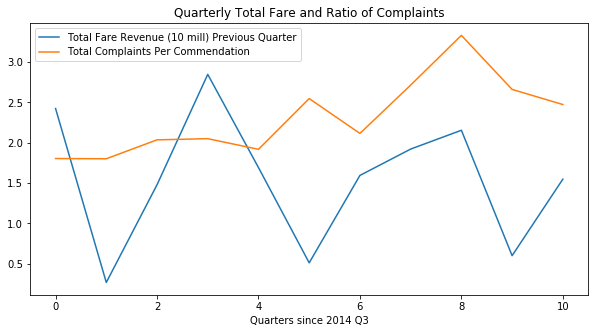

In [82]:
plt.figure(figsize=(10,5))
plt.plot(range(len(full)),full)
plt.plot(range(len(full)),comp)
plt.title('Quarterly Total Fare and Ratio of Complaints')
plt.xlabel('Quarters since 2014 Q3')
plt.legend(['Total Fare Revenue (10 mill) Previous Quarter','Total Complaints Per Commendation'])
plt.show()

Above we see an overall increase in ratio of complaints seemingly regardless of total fare revenue (and thus total number of rides as well). It may be interesting, then, to explore why this is occurring as it reflects rather poorly on MTA uasage of funds.